# Initial test to run ECmean4 functions within the AQUA framework

We load the AQUA routines, keeping in mind that we need to adjust some path

In [1]:
from aqua import Reader
import xarray as xr

Start loading the ecmean functions, define the years of the experiments and experiment name. We define both atmospheric and oceanic models, as well initial and final years and the name of the configuration file. 

In [2]:
from ecmean.global_mean import global_mean
from ecmean.performance_indices import performance_indices
from wand.image import Image as WImage # to open PDFs in jupyter

model_atm = 'IFS'
model_oce = 'FESOM'
exp = 'tco2559-ng5'
year1 = 2020
year2 = 2020
numproc = 1
interface = 'IFS+FESOM'
config = 'config.yml'

Call the reader for the atmospheric and oceanic components. Currently separated to avoid conflicts between variables with same name. For safety, we remove sea ice from atmospheric dataset.

In [3]:
# areas false is needed since this is not used by ECmean and can create some issue
reader_atm = Reader(model=model_atm, exp=exp, source="lra-r100-mon", areas=False)
data_atm = reader_atm.retrieve(fix=False)
data_atm = data_atm.drop('ci')
data_atm
#data_atm.data_vars['mtntrf'].attrs['name']

<xarray.Dataset>
Dimensions:  (time: 13, lat: 180, lon: 360, plev: 23)
Coordinates:
  * time     (time) datetime64[ns] 2020-01-20 2020-02-01 ... 2021-01-01
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * plev     (plev) float64 1e+05 9.75e+04 9.5e+04 ... 3e+03 1e+03 100.0
Data variables: (12/18)
    2t       (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    erate    (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    ewss     (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    hcc      (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    lcc      (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    mcc      (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    ...       ...
    nsss     (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    q        (time, plev, lat, lon) float64 dask.array<chunksize=(12, 23, 180, 360), meta=np.ndarray>
    t        (time, plev, lat, lon) float64 dask.array<chunksize=(12, 23, 180, 360), meta=np.ndarray>
    tprate   (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    u        (time, plev, lat, lon) float64 dask.array<chunksize=(12, 23, 180, 360), meta=np.ndarray>
    v        (time, plev, lat, lon) float64 dask.array<chunksize=(12, 23, 180, 360), meta=np.ndarray>
Attributes:
    history:  2023-04-19 16:01:57 retrieved by AQUA retriever;\n

In [4]:
# areas false is needed since this is not used by ECmean and can create some issue
reader_oce = Reader(model=model_oce, exp=exp, source="lra-r100-mon", areas=False)
data_oce = reader_oce.retrieve(fix=False)
data_oce

<xarray.Dataset>
Dimensions:  (time: 12, lat: 180, lon: 360)
Coordinates:
  * time     (time) datetime64[ns] 2020-01-20 2020-02-01 ... 2020-12-01
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    ci       (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    sithick  (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    sos      (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    sst      (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    zos      (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
Attributes:
    history:  2023-04-19 16:01:58 retrieved by AQUA retriever;\n

We merge the two dataset to feed them into the AQUA tool

In [5]:
data = xr.merge([data_atm, data_oce])
data

<xarray.Dataset>
Dimensions:  (time: 13, lat: 180, lon: 360, plev: 23)
Coordinates:
  * time     (time) datetime64[ns] 2020-01-20 2020-02-01 ... 2021-01-01
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * plev     (plev) float64 1e+05 9.75e+04 9.5e+04 ... 3e+03 1e+03 100.0
Data variables: (12/23)
    2t       (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    erate    (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    ewss     (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    hcc      (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    lcc      (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    mcc      (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    ...       ...
    v        (time, plev, lat, lon) float64 dask.array<chunksize=(12, 23, 180, 360), meta=np.ndarray>
    ci       (time, lat, lon) float64 dask.array<chunksize=(13, 180, 360), meta=np.ndarray>
    sithick  (time, lat, lon) float64 dask.array<chunksize=(13, 180, 360), meta=np.ndarray>
    sos      (time, lat, lon) float64 dask.array<chunksize=(13, 180, 360), meta=np.ndarray>
    sst      (time, lat, lon) float64 dask.array<chunksize=(13, 180, 360), meta=np.ndarray>
    zos      (time, lat, lon) float64 dask.array<chunksize=(13, 180, 360), meta=np.ndarray>
Attributes:
    history:  2023-04-19 16:01:57 retrieved by AQUA retriever;\n

# Global Mean
Basic call to global mean, creating a dumb interface file for IFS/FESOM and working directly on the 1x1 files

In [16]:
global_mean(exp, year1, year2, numproc = numproc, config = config, 
            interface = 'interface_' + interface + '.yml', loglevel = 'info', xdataset = data)

Welcome to ECmean4: Running %s! global_mean


Average pme ALL Global 0.004547403375487851
Average pr_oce ALL Global 14.01064752827443
Average pme_oce ALL Global -1.601442600993684
Average pr_land ALL Global 3.869315622331849
Average pme_land ALL Global 1.6282883058695956


Average net_sfc_nosn ALL Global 4.6972054262497
Average tas ALL Global 10.33948325508851
Average psl ALL Global 1011.3618845751063
Average pr ALL Global 3.028693236422116
Average evspsbl ALL Global -3.024145833046623
Average cll ALL Global 0.3552199810641333
Average clm ALL Global 0.23954072367797802
Average clh ALL Global 0.3892220085830719


Average rlnt ALL Global -242.2266312397787
Average rsns ALL Global 167.27826697303567
Average rlns ALL Global -57.88651353800637
Average hfss ALL Global -17.10197341809811
Average hfls ALL Global -87.5925745906816


Average tos ALL Global 18.711918432820482


Average sos ALL Global 34.521392843626884


Average siconc ALL Global 0.19459538794555453


Done in 4.1613 seconds
/work/bb1153/b382076/ecmean/tables/global_mean_tco2559-ng5_IFS+FESOM_r1i1p1f1_2020_2020.txt
Postproc done in 1.5607 seconds


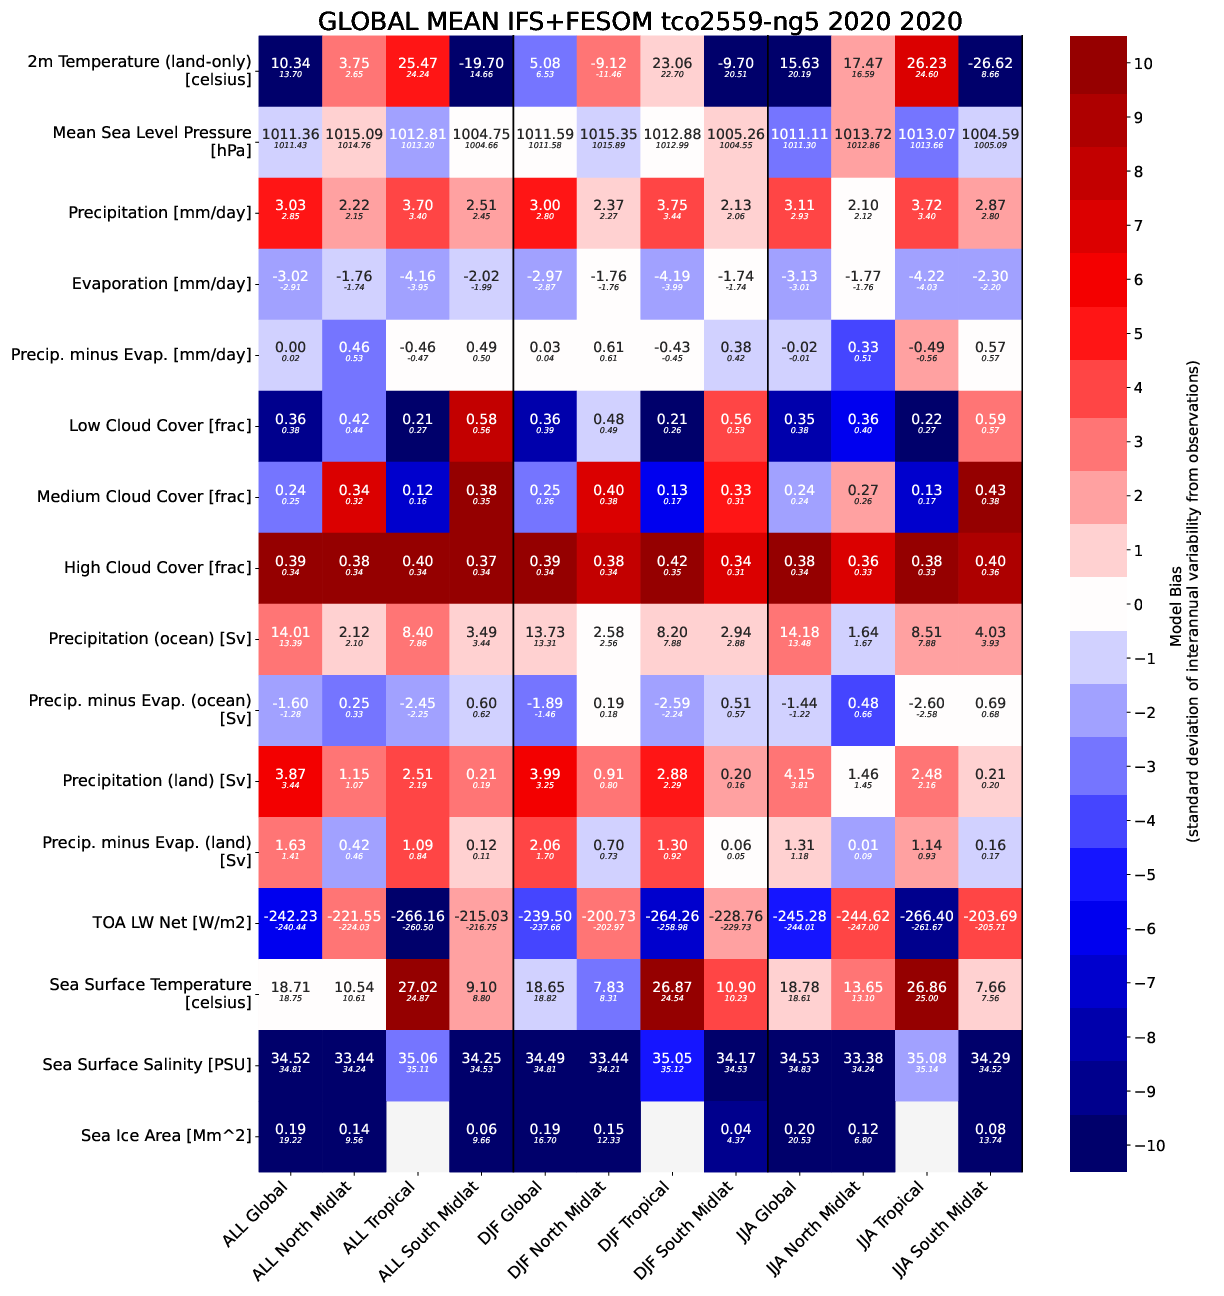

In [17]:
img = WImage(filename=f'/work/bb1153/b382076/ecmean/figures/global_mean_{exp}_{interface}_r1i1p1f1_{year1}_{year2}.pdf')
img

# Performance indices
Basic call to performance indices

In [18]:
performance_indices(exp, year1, year2, numproc = numproc, config = config, 
            interface = 'interface_' + interface + '.yml', loglevel = 'info', xdataset = data)

Welcome to ECmean4: Running %s! performance_indices


/work/bb1153/b382076/mambaforge/envs/aqua-ecmean/lib/python3.10/site-packages/xarray/core/dataarray.py:855: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return key in self.data


Preproc in 2.8729 seconds


PI for Global ALL ta 20.008


PI for Global DJF ta 7.946


PI for Global JJA ta 19.342


PI for Global ALL ua 4.245


PI for Global DJF ua 2.343


PI for Global JJA ua 5.245


PI for Global ALL va 3.718


PI for Global DJF va 2.032


PI for Global JJA va 4.612


PI for Global ALL hus 14.142


PI for Global DJF hus 14.523


PI for Global JJA hus 13.446
PI for Global ALL tas 28.506
PI for Global DJF tas 13.937
PI for Global JJA tas 27.218
PI for Global ALL pr 5.444
PI for Global DJF pr 3.438
PI for Global JJA pr 5.181
PI for Global ALL psl 3.152
PI for Global DJF psl 1.549
PI for Global JJA psl 2.83
PI for Global ALL tos 10.638
PI for Global DJF tos 6.251
PI for Global JJA tos 8.588
PI for Global ALL sos 8.158
PI for Global DJF sos 6.176
PI for Global JJA sos 6.789
Done in 21.5228 seconds with 1 processors
Postproc done in 0.8088 seconds


Open the obtained txt file

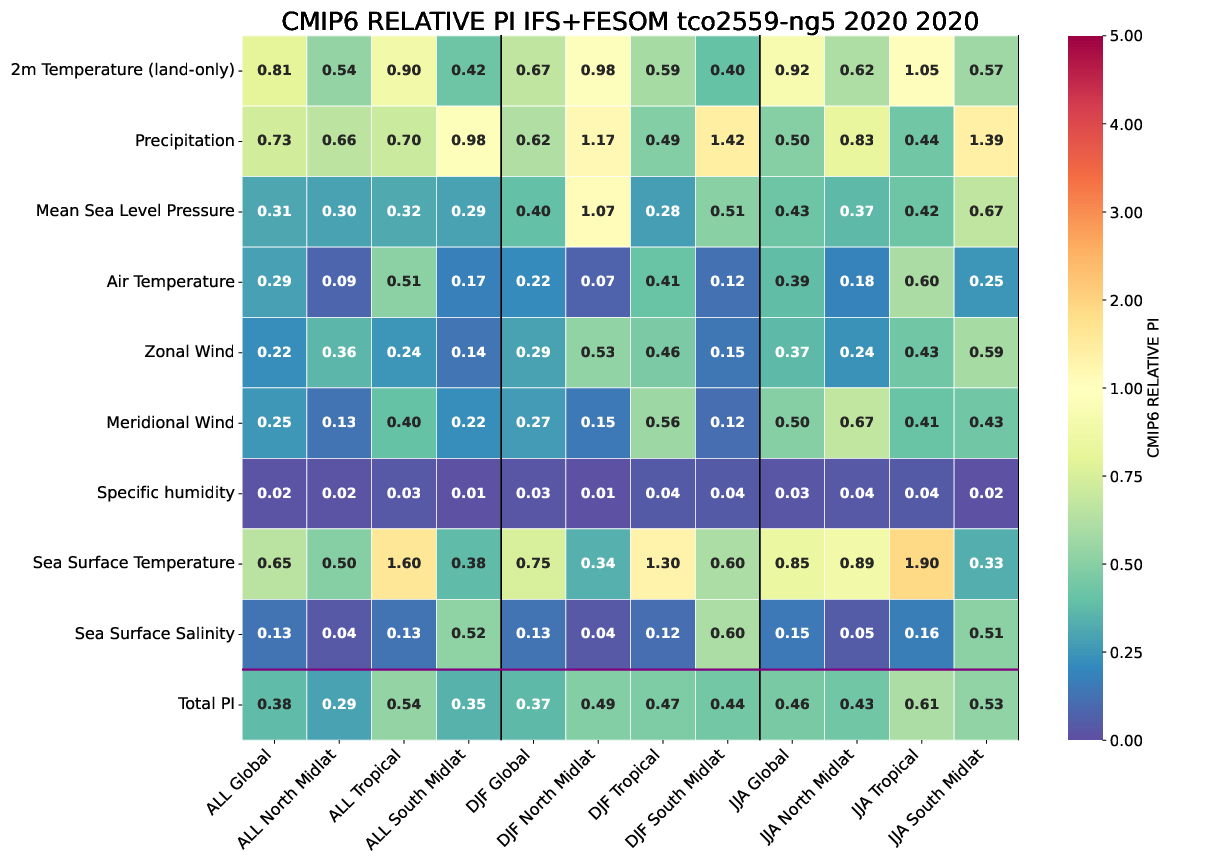

In [10]:
img = WImage(filename=f'/work/bb1153/b382076/ecmean/figures/PI4_EC23_{exp}_{interface}_r1i1p1f1_{year1}_{year2}.pdf')
img